In [4]:
# Import Packages and Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

data = pd.read_csv('data/kc_house_data.csv')

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
ldf = data.drop(labels = ['id', 'date'], axis=1)

df = ldf.drop(labels = ['address', 'lat', 'long', 'sqft_above'], axis=1)

### Filter--> Focusing Prices of Single Family Homes
 * Filter: Between 2 - 4 Bedrooms

In [8]:
df['bedrooms'].value_counts()

df['bedrooms_filter'] = df['bedrooms'].apply(lambda x: 1 if 2 <= x <= 4 else 0)

df['bedrooms_filter'].value_counts()

newdf = df[df['bedrooms_filter'] == 1]

In [9]:
df = newdf.copy()

<AxesSubplot:>

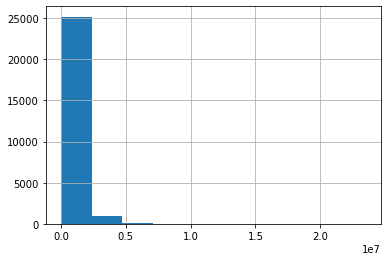

In [11]:
df['price'].hist()

In [ ]:
# Dropping 

In [12]:
print(df['bedrooms'].value_counts())

df['bathrooms'].value_counts()

3    12754
4     9597
2     3936
Name: bedrooms, dtype: int64


2.50    8062
2.00    6973
1.00    4196
3.00    3019
1.50    1743
3.50    1687
4.00     327
4.50     202
5.00      37
5.50      25
6.00       6
0.00       4
0.50       3
6.50       2
7.50       1
Name: bathrooms, dtype: int64

Remove 0 Bathroom houses

In [13]:
zero_bathroom_df = df.loc[df['bathrooms'] == 0] #In case we want to explore later
df = df[df['bathrooms'] != 0]

df.info()

print(f"Removed {30111 - 30086} rows due to zero bathrooms.")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26283 entries, 0 to 30154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            26283 non-null  float64
 1   bedrooms         26283 non-null  int64  
 2   bathrooms        26283 non-null  float64
 3   sqft_living      26283 non-null  int64  
 4   sqft_lot         26283 non-null  int64  
 5   floors           26283 non-null  float64
 6   waterfront       26283 non-null  object 
 7   greenbelt        26283 non-null  object 
 8   nuisance         26283 non-null  object 
 9   view             26283 non-null  object 
 10  condition        26283 non-null  object 
 11  grade            26283 non-null  object 
 12  heat_source      26267 non-null  object 
 13  sewer_system     26275 non-null  object 
 14  sqft_basement    26283 non-null  int64  
 15  sqft_garage      26283 non-null  int64  
 16  sqft_patio       26283 non-null  int64  
 17  yr_built    

# Single Linear Regression: View (Y/N)

In [22]:
# Question: Are houses with no view cheaper than houses with any type of view?

df['view_binary'] = df['view'].apply(lambda x: 0 if x == 'NONE' else 1)

df['view_binary'].value_counts()

y = df['price']
x = df['view_binary']

model = sm.OLS(y,x).fit()

model.summary()

# Recommendation : Invest in houses without a view

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.176
Model:                            OLS   Adj. R-squared (uncentered):              0.176
Method:                 Least Squares   F-statistic:                              5600.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):                        0.00
Time:                        14:54:55   Log-Likelihood:                     -4.0428e+05
No. Observations:               26283   AIC:                                  8.086e+05
Df Residuals:                   26282   BIC:                                  8.086e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
view_binary  1.616e+06   2.16e+04     74.832      0.000    1.57e+06    1.66e+06
==============================================================================
Omnibus:                    22284.292   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3156326.053
Skew:                           3.434   Prob(JB):                         0.00
Kurtosis:                      56.245   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Bar Plot

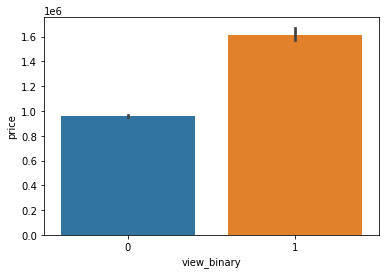

In [25]:
sns.barplot(x = df['view_binary'],
            y = df['price'],
            data = df);

## 2. Size to Number of Bedrooms Ratio

In [33]:
# House size is associated with increased price
# Size doesn't influence Section 8 rent, only number of bedrooms does.
# Ideal combination = low size, high number of bedrooms (low size:bedroom ratio)

#Question 2: How does size:bedroom ratio relate to house price? 
# Are houses with a lower size:bedroom ratio cheaper than houses with a high size:bedroom ratio?

df['size_to_num_bedroom_ratio'] = df['sqft_living'] / df['bedrooms']

y = df['price']
x = df['size_to_num_bedroom_ratio']

model = sm.OLS(y,x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.749
Model:                            OLS   Adj. R-squared (uncentered):              0.749
Method:                 Least Squares   F-statistic:                          7.840e+04
Date:                Thu, 08 Dec 2022   Prob (F-statistic):                        0.00
Time:                        15:09:45   Log-Likelihood:                     -3.8865e+05
No. Observations:               26283   AIC:                                  7.773e+05
Df Residuals:                   26282   BIC:                                  7.773e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
size_to_num_bedroom_ratio  1709.3193      6.105    280.008      0.000    1697.354    1721.285
==============================================================================
Omnibus:                    33007.530   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         15272262.925
Skew:                           6.486   Prob(JB):                         0.00
Kurtosis:                     120.377   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# Lower size to bedroom ratio = CHEAPER buying point, but more profit from rent

# Best to invest in 4-bedroom properties with a lower sqft_living space

** visualization? **

# How does Year Built influence the purchase price of the house?

In [35]:
# Real Estate rule of thumb: older houses tend to be cheaper than new houses

# Potential Downside: older houses also tend to cost more in upkeep, maintenance. 

# As a renter, What age of house is best to buy to minimize initial cost?

y = df['price']
x = df['yr_built']
model = sm.OLS(y,x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.657
Model:                            OLS   Adj. R-squared (uncentered):              0.657
Method:                 Least Squares   F-statistic:                          5.033e+04
Date:                Thu, 08 Dec 2022   Prob (F-statistic):                        0.00
Time:                        15:12:07   Log-Likelihood:                     -3.9275e+05
No. Observations:               26283   AIC:                                  7.855e+05
Df Residuals:                   26282   BIC:                                  7.855e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr_built     523.7036      2.334    224.350      0.000     519.128     528.279
==============================================================================
Omnibus:                    31036.770   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8624588.386
Skew:                           5.947   Prob(JB):                         0.00
Kurtosis:                      90.943   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#Older houses are cheaper than newer houses so not interesting